<a href="https://colab.research.google.com/github/wenfeng7k/pytorch_models/blob/main/Linear_Regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [3]:
weight=0.3
bias=0.5
X=torch.arange(0,10,0.1).unsqueeze(dim=1)
y=weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000]]),
 tensor([[0.5000],
         [0.5300],
         [0.5600],
         [0.5900],
         [0.6200],
         [0.6500],
         [0.6800],
         [0.7100],
         [0.7400],
         [0.7700]]))

In [4]:
train_split=int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

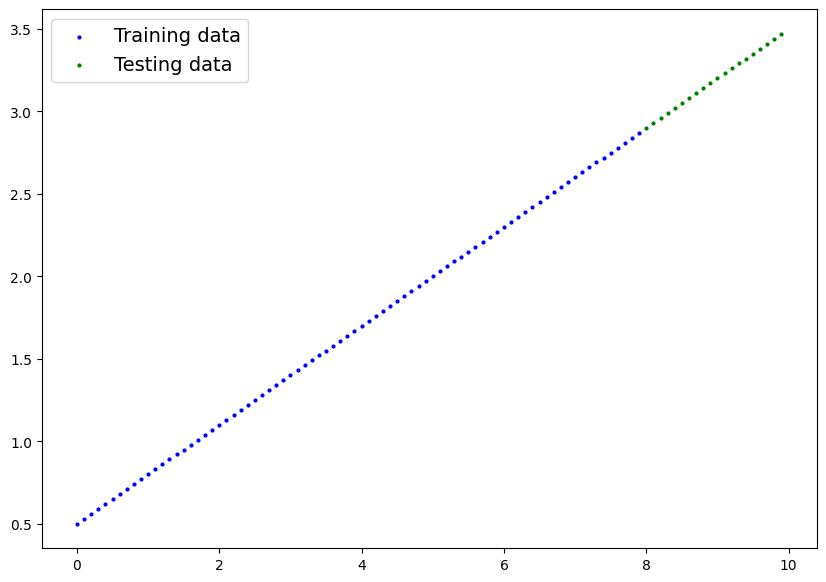

In [5]:
def plot(train_data=X_train,
         train_labels=y_train,
         test_data=X_test,
         test_labels=y_test,
         predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data, test_labels, c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={'size': 14})
plot(X_train,y_train,X_test,y_test)

In [6]:
class LinearRegressionModels(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)

In [7]:
torch.manual_seed(42)
model_1 = LinearRegressionModels()
model_1,model_1.state_dict()

(LinearRegressionModels(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [8]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [9]:
loss_fn=nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [10]:
torch.manual_seed(42)

epochs = 1000
X_train = X_train.float().to(device)
X_test = X_test.float().to(device)
y_train = y_train.float().to(device)
y_test = y_test.float().to(device)

In [11]:
for epoch in range(epochs):
  model_1.train()

  #1.Forward pass
  y_pred = model_1(X_train)

  #2.Calculate loss
  loss = loss_fn(y_pred,y_train)

  #3.zero grad optimizer
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5.Step the optimizer
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 ==0:
    print(f"Epoch:{epoch} | Train loss :{loss} | Test loss :{test_loss}")

Epoch:0 | Train loss :2.1649351119995117 | Test loss :4.451274871826172
Epoch:100 | Train loss :0.5046864748001099 | Test loss :0.8160266280174255
Epoch:200 | Train loss :0.07247274369001389 | Test loss :0.10342752188444138
Epoch:300 | Train loss :0.055552758276462555 | Test loss :0.07949614524841309
Epoch:400 | Train loss :0.038632798939943314 | Test loss :0.055564869195222855
Epoch:500 | Train loss :0.021712446585297585 | Test loss :0.03163349628448486
Epoch:600 | Train loss :0.005535671021789312 | Test loss :0.01340627670288086
Epoch:700 | Train loss :0.0033600374590605497 | Test loss :0.0303335078060627
Epoch:800 | Train loss :0.003085323376581073 | Test loss :0.03060819022357464
Epoch:900 | Train loss :0.003085323376581073 | Test loss :0.03060819022357464


In [12]:
from pprint import pprint
pprint(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.3005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5010], device='cuda:0'))])


In [13]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[2.9052],
        [2.9353],
        [2.9653],
        [2.9954],
        [3.0255],
        [3.0555],
        [3.0856],
        [3.1156],
        [3.1457],
        [3.1757],
        [3.2058],
        [3.2358],
        [3.2659],
        [3.2959],
        [3.3260],
        [3.3560],
        [3.3861],
        [3.4161],
        [3.4462],
        [3.4762]], device='cuda:0')

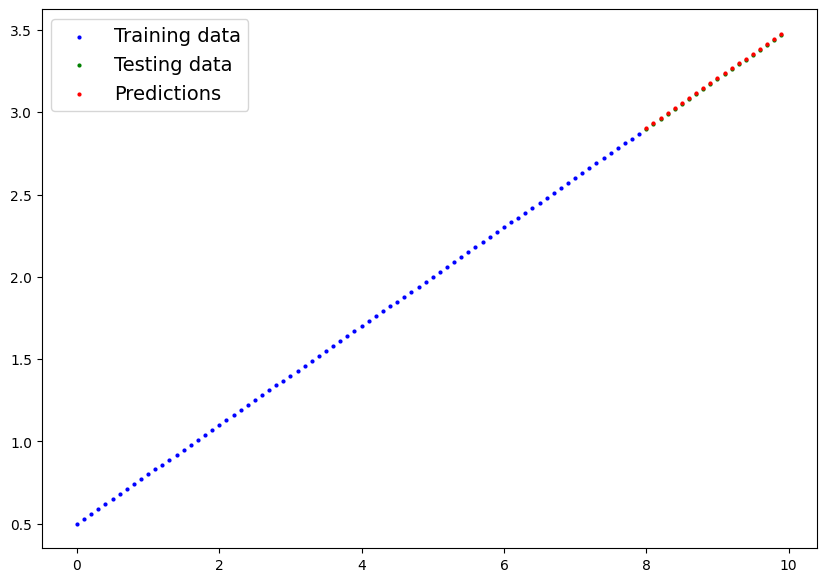

In [14]:
plot(predictions=y_preds.cpu())

In [19]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to :models/model_1.pth


In [20]:
loaded_model_1=LinearRegressionModels()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")


Loaded model:
LinearRegressionModels(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [21]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')